# Image Comparison

* Image Transformation
* Mean absolute error

In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi

In [2]:
brain_alz = imageio.imread('brain_alz.jpg') #Alzheimer's Disease
brain_typ = imageio.imread('brain_typ.jpg') #Typical Brain

In [7]:
def displayImages(im1,im2):
    fig, axes = plt.subplots(1,2)
    axes[0].imshow(im1,cmap='gray')
    axes[1].imshow(im2,cmap='gray')
    plt.show()

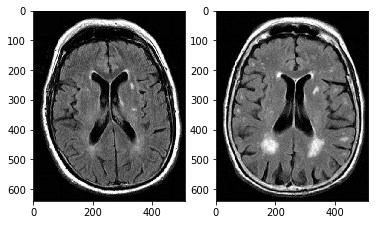

In [8]:
displayImages(brain_alz,brain_typ)

In [9]:
def MAE(im1,im2):
    #Input: two images, Output: compute mean absolute error
    return np.mean(np.abs(im1-im2))

In [10]:
#Goal is to make this error as small as possible
MAE(brain_alz,brain_typ)

125.21649169921875

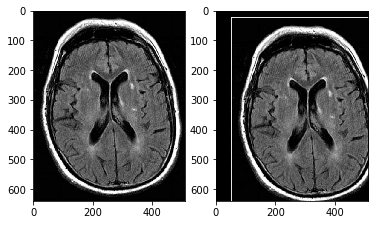

In [25]:
#transformation, move image (right, down,z)
brain_trans = ndi.shift(brain_alz,shift=(25,50,0)) #25 down 50 to the right 0, keeps image to same color...scale from -2 to 2
displayImages(brain_alz,brain_trans)

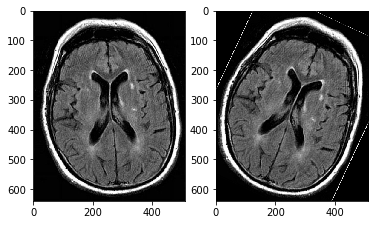

In [27]:
#rotation counter clockwise
brain_rot = ndi.rotate(brain_alz,angle=-25, reshape = False) #reshape tries to fit the image in with out changing it's original size. without it, the image willshrink to fit everything
displayImages(brain_alz,brain_rot) 

In [29]:
#Center of Mass (COM)
def useCOM(im):
    com = ndi.center_of_mass(im)
    shp = im.shape
    return ndi.shift(im,shift = (shp[0]/2 - com[0], shp[1]/2-com[1],0))

Modified Brains


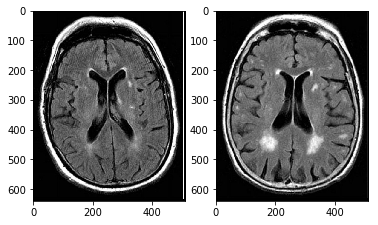

Original Brains


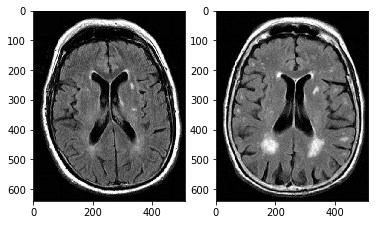

The error at this point is 101.6836944580078.
 The original error was 125.21649169921875


In [33]:
brain_alz_com = useCOM(brain_alz)
brain_typ_com = useCOM(brain_typ)
print('Modified Brains')
displayImages(brain_alz_com,brain_typ_com)
print('Original Brains')
displayImages(brain_alz,brain_typ)
print('The error at this point is {}.\n The original error was {}'.format(MAE(brain_typ_com,brain_alz_com),MAE(brain_alz,brain_typ)))

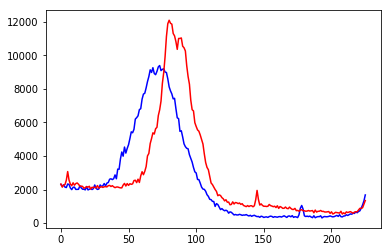

In [38]:
#Extraction
hist_alz = ndi.histogram(brain_alz_com, 25, 250,226) #Started at 25 ended at 250
hist_typ = ndi.histogram(brain_typ_com, 25, 250,226) #started at 25 to not look at black pixels
plt.plot(hist_alz, color = 'blue')
plt.plot(hist_typ, color = 'red')
plt.show()

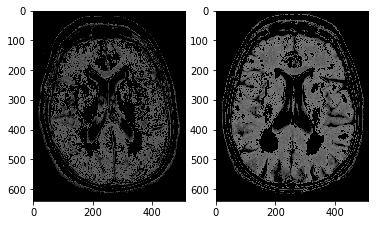

The error at this point is 51.739932250976565.
 The original error was 125.21649169921875


In [42]:
brain_alz_mask = np.where((brain_alz_com>25) & (brain_alz_com<100), brain_alz_com,0)
brain_typ_mask = np.where((brain_typ_com>50) & (brain_typ_com<125), brain_typ_com,0)

displayImages(brain_alz_mask,brain_typ_mask)
print('The error at this point is {}.\n The original error was {}'.format(MAE(brain_typ_mask,brain_alz_mask),MAE(brain_alz,brain_typ)))

In [43]:
#Finding the best angle
best_angle = 0
best_MAE = 999
for theta in range(360):
    brain_rot = ndi.rotate(brain_alz_mask, angle = theta, reshape = False)
    this_MAE = MAE(brain_rot, brain_typ_mask)
    if this_MAE<best_MAE:
        best_angle = theta
        best_MAE = this_MAE
        
print(best_angle)
print(best_MAE)

brain_alz_rot = ndi.rotate(brain_alz_mask, angle = best_angle, reshape=False)

0
78.58506774902344


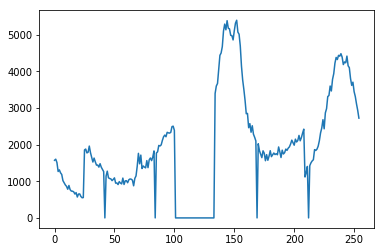

In [44]:
#Showinf differences 
brain_diff = np.abs(brain_alz_mask - brain_typ_mask)
hist_diff = ndi.histogram(brain_diff, 1,250,255)
plt.plot(hist_diff)
plt.show()

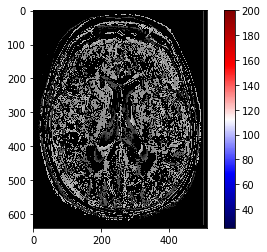

In [46]:
brain_diff_mask = np.where((brain_diff>=25) & (brain_diff<= 200), brain_diff,0)
plt.imshow(brain_diff_mask, cmap = 'seismic', vmin = 25, vmax = 200)
plt.colorbar()
plt.show()